As mentioned, we will look at two models for this project. We would like to see how a parametric and non parametric test will do in this dataset

In [1]:
#import pandas and numpy
#import seaborn and matplotlib for visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data into a pandas dataframe
cs = pd.read_csv("../assets/train.csv")
cs_test = pd.read_csv("../assets/test.csv")

In [3]:
#check our data
cs.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
#Check which columns have null values
cs.isnull().sum()

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

In [5]:
#our data has no null values
#let's take a look at the datatypes
cs.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [6]:
#let's see how many features we are dealing with
print cs.shape

(76020, 371)


The data has numeric types, which is what we want for our modeling

We can see that we have 371 features to work with. If we had less features, it would have been good to look at the distribution of our features because this would tell us which model would perform better. But because plotting will make our kernel die (trust me I tried), this case study will tell us if a parametric or non parametric model would do better in this project. 

Because this is a Kaggle competition, we can actually see what scoring system they have, and this should tell us more or less what would work better. Assumptions aside, let's proceed!

When we looked at our dataset using head at the very start, you might have noticed that var3 had twos, var15 had 20s, the imp features had 0.0 and 195.0 and var38 had xx000s. Let's take a look at their values to have a better grasp of what these columns look like

In [7]:
#Let's try another function of pandas DataFrame/Series that can give us a description of the columns.
cs["var3"].describe()

count     76020.000000
mean      -1523.199277
std       39033.462364
min     -999999.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         238.000000
Name: var3, dtype: float64

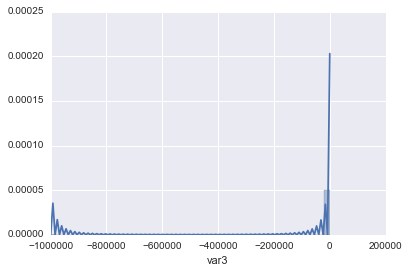

In [8]:
#We can also take a look at visually using seaborn's distplot
sns.distplot(cs["var3"])

In [9]:
#It kind of looks like a bimodal distribution, but what we can see in our describe function,
#the mean is at -1523 with an std of 39033. Let's take a look at the other features to compare.
cs["var15"].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

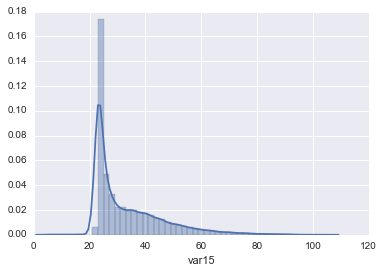

In [10]:
sns.distplot(cs["var15"])

In [11]:
#For var15, we can see that the values are all positive and the distribution is skewed to the right
#Let's take a look at one of the "imp.*" features
cs["imp_ent_var16_ult1"].describe()

count     76020.000000
mean         86.208265
std        1614.757313
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      210000.000000
Name: imp_ent_var16_ult1, dtype: float64

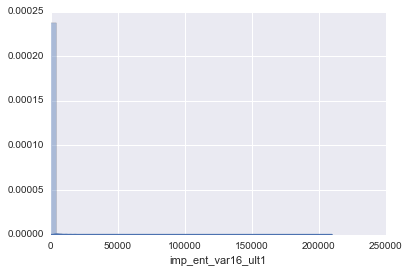

In [12]:
sns.distplot(cs["imp_ent_var16_ult1"])

In [13]:
cs["var38"].describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

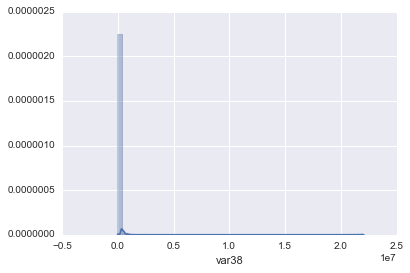

In [14]:
sns.distplot(cs["var38"])

We've seen very different distributions and range for some of our features. 

At this point, knowing there are no missing values, knowing we have all numeric columns and understanding the distribution of our dataset, we can now start modeling. Yay! But... one thing that immediately comes to mind for me is, do I need to standardize our features? Standardization means that we would put them in the same scale. In logistic regression, having our features in different scales should not be an issue. However, when we want to use optimization techniques, having standardized features makes convergence faster.

How about for KNN? Since KNN use euclidian distance, we would need to have th e features in the same scale. With those things in mind, we should standardize our features!


In [15]:
#sklearn has different preprocessing techniques. In our case, we should use StandardScaler()
#Let's also import our logistic regression model and knn classifier
#For optimization, let's import ridgecv and lassocv, as well as gridsearchcv
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

In [16]:
sample = pd.read_csv("../assets/sample_submission.csv")

In [43]:
#let's start with the preprocessing. We want all our Xs (features) to be in the same scale, so we do a fit_transform
#we only want to include dataframe that excludes the id and target - which we can do using iloc

X = StandardScaler().fit_transform(cs.iloc[:,1:(cs.shape[1]-1)])
y = cs["TARGET"]

We can definitely train our model using our whole train data because we have a test set that was provided. However, I'm going to do a train test split because it's normal practice that we have the whole dataset and we split this into a train set and a test set. This is sort of a different scenario because it's a competition so they set aside part of the data where only the competition admin would have the right answers

In [44]:
#import train test split
from sklearn.cross_validation import train_test_split

In [45]:
#im defining a function to do the model predictions and saving them to csv
def exportToCSV(model,modelname):
    global X_train, y_train, sample, X_test
    predictions = model.predict_proba(X_test)[:,1]
    sample['TARGET'] = predictions
    sample.to_csv('../results/%s.csv'%modelname, index=False)

In [46]:
#train and test split with test size 30% of our data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [21]:
#When instantiating a KNeighbors classifier, default is k=5
#The model is built upon the score accuracy which is not the scoring process in Kaggle
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
#Don't be confused here. I'm not using the test sets from the train test split
#Instead, I'm using the actual test set from Kaggle and doing the same thing we did with our X train (standardize)
X_test = StandardScaler().fit_transform(cs_test.iloc[:,1:(cs.shape[1]-1)])

In [23]:
#Now we can predict the X test with the same model by calling our function
exportToCSV(knn,"knn")

The initial score that we got from KNN is .649, which is not too bad but it isn't great. What we might like to do next is to see if optimizing our classifier would help. I'm going to use GridSearch and try changing the number of neighbors, weights and penalty. I wanted to try the algorithm as well, but because the processing power of my laptop is not that great, it runs forever. I'll comment the algorithm out just so that we can see what kind of algorithms we can try.

We also have to take note that the scoring system of this competition is AUC. Our classifier uses accuracy, so we would want to do our gridsearch based on the auc scoring. To learn more about AUC, here's a video by Joseph Nelson that explains this pretty well. https://www.youtube.com/watch?v=O--UtzxDUvM 

In [24]:
#Let's now use GridSearch to do optimization on our knn model and use the scoring=roc_auc
#the parameters that we may want to change in KNN are the number of neighbors, weights, algorithms and p
search_parameters = {
    'n_neighbors':  [3,10], 
    'weights':      ("uniform", "distance"),
    #'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2]
}

In [25]:
#Instantiate our GridSearch with the KNN model that we just did, the parameters we want to test
#Let's also put the scoring as roc_auc
knn_grid = GridSearchCV(knn, search_parameters,scoring="roc_auc",n_jobs=-1)

In [26]:
#We
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 10], 'weights': ('uniform', 'distance'), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [27]:
exportToCSV(knn_grid,"knn_grid")

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
exportToCSV(lr,"lr")

In [38]:
search_parameters = {
    "penalty":             ['l1','l2'],   #Ridge or Lasso
    "C":                   [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0],  # Regularization paramter
    "fit_intercept":       [False, True],
    "class_weight":        [None, "balanced"],
    "intercept_scaling":   [2, 1], 
    "warm_start":          [False, True]
}

lr_grid = GridSearchCV(lr, search_parameters, verbose=True,scoring="roc_auc",n_jobs=-1)

In [ ]:
lr_grid.fit(X_train, y_train)

Fitting 3 folds for each of 544 candidates, totalling 1632 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 42.4min


In [ ]:
exportToCSV(lr_grid,"lr_grid")

I wanted to look at two regularization techniques in this project as well. You may know about Lasso and Ridge when we instantiate a Logistic Regression model.

In ridge regression, the penalty is calculated by the sum of the squares of the coefficients. This means that we can't zero coefficients so you would either end up including all or none of the coefficients.

In lasso, because the penalty is the sum of the absolute values of the coefficients, it does both parameter shrinkage and variable selection automatically.

We will be taking a look at both of these and see how they would do.

In [48]:
#Let's use LassoRegCV and pull out some features based on the coefficients of the equation
lassoregcv = LassoCV(alphas=[0.1, 1, .001, .01, 10])
lassoregcv.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1, 0.001, 0.01, 10], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [35]:
#I'm appending the columns that do not have the 0.001 importance and adding it to the filtered list
filtered = []
for a,b in zip(lassoregcv.coef_, cs_test.iloc[:,1:(cs.shape[1]-1)].columns):
    if abs(a) > 0.001:
        filtered.append(b)

In [36]:
X_filtered = StandardScaler().fit_transform(cs[filtered])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered,y,test_size=0.3, random_state=42)

In [38]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
X_test = StandardScaler().fit_transform(cs_test[filtered])
predictions = lr.predict_proba(X_test)[:,1]
sample['TARGET'] = predictions
sample.to_csv('../results/lr_filtered.csv', index=False)

Our model score went down by a really really small margin with the features that we selected to build our logistic regression.